In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


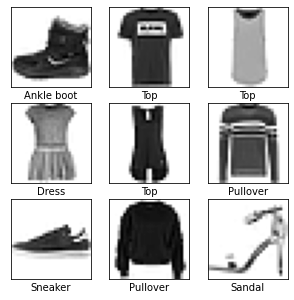

In [6]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [17]:
model = tf.keras.models.Sequential()

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu',input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax' ))

In [19]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

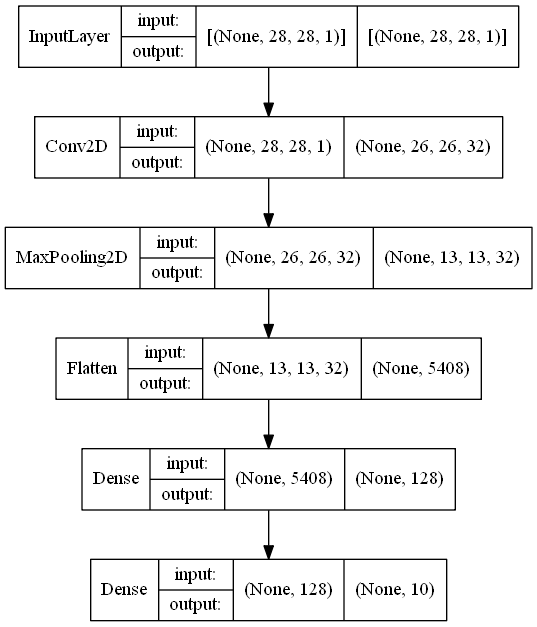

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [22]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [23]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1,callbacks = EarlyStopping(monitor='loss', patience=5)) 

Epoch 1/50
375/375 [==============================] - 9s 23ms/step - loss: 0.4046 - val_loss: 0.2956
Epoch 2/50
375/375 [==============================] - 7s 19ms/step - loss: 0.2694 - val_loss: 0.2806
Epoch 3/50
375/375 [==============================] - 7s 19ms/step - loss: 0.2233 - val_loss: 0.2800
Epoch 4/50
375/375 [==============================] - 7s 19ms/step - loss: 0.1905 - val_loss: 0.3140
Epoch 5/50
375/375 [==============================] - 7s 19ms/step - loss: 0.1638 - val_loss: 0.3126
Epoch 6/50
375/375 [==============================] - 7s 19ms/step - loss: 0.1444 - val_loss: 0.3280
Epoch 7/50
375/375 [==============================] - 7s 18ms/step - loss: 0.1281 - val_loss: 0.3578
Epoch 8/50
375/375 [==============================] - 7s 19ms/step - loss: 0.1173 - val_loss: 0.3573
Epoch 9/50
375/375 [==============================] - 7s 19ms/step - loss: 0.1122 - val_loss: 0.4279
Epoch 10/50
375/375 [==============================] - 7s 19ms/step - loss: 0.0976 - val_lo

<AxesSubplot:>

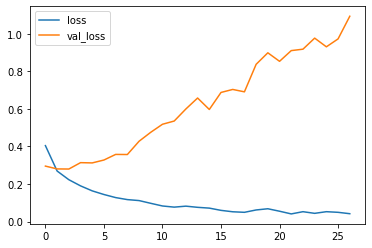

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [25]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

In [26]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Top       0.84      0.83      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.86      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.81      0.78      0.79      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.66      0.70      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

